<a href="https://colab.research.google.com/github/MohamedShoaib3/Algorithms_python/blob/main/bank_binary_classification_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏆 Kaggle Playground S5E8 - ML Competition

## 📖 Introduction
This notebook demonstrates how to participate in the **Kaggle Playground Series S5E8** competition.  
We will load the data, explore it, build a simple baseline model, and submit predictions to Kaggle.

---

## 🔑 Kaggle API Setup
In this step, we set up the Kaggle API to easily download competition data directly into this notebook.  
We upload the `kaggle.json` API key, configure the Kaggle CLI, and prepare the environment for downloading files.

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohamedshoaib25","key":"c9e31b6ca4f02911f579757051f04533"}'}

## 📂 Download Dataset
Now we use the Kaggle API to download the competition dataset and unzip the files so we can work with them in Colab.

In [3]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c playground-series-s5e8
!unzip playground-series-s5e8.zip

  0% 0.00/14.7M [00:00<?, ?B/s]
100% 14.7M/14.7M [00:00<00:00, 898MB/s]
Archive:  playground-series-s5e8.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## 📥 Load Data
Here we load the `train.csv`, `test.csv`, and `sample_submission.csv` files into Pandas DataFrames for analysis.

In [4]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

train

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0


## 🔍 Explore Data (EDA)
In this step, we explore the data by checking its shape, column types, missing values, and descriptive statistics.  
This helps us understand the dataset before preprocessing and modeling.

---
####Shape of the dataset

In [5]:
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

Train Shape: (750000, 18)
Test Shape: (250000, 17)


#### Data types of columns

In [6]:
train.dtypes

,0
id,int64
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object


In [7]:
test.dtypes

,0
id,int64
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object


#### Check missing values

In [8]:
train.isnull().sum()

,0
id,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


In [9]:
test.isnull().sum()

,0
id,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


#### Summary statistics


In [10]:
train.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


## 📊 Advanced EDA (Exploratory Data Analysis)

In this section, we perform advanced data exploration using visualizations.  
We will look at data distribution, detect outliers, study correlations, and analyze the target variable `y`.

---

###  Distribution of Numeric Features
We will plot histograms with KDE (Kernel Density Estimation) for each numeric column to understand the data distribution.


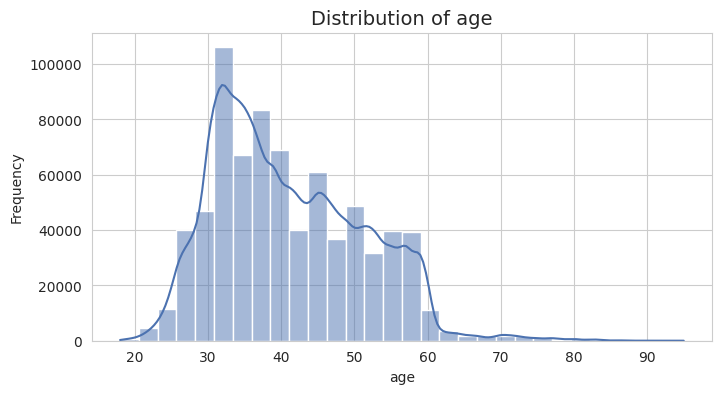

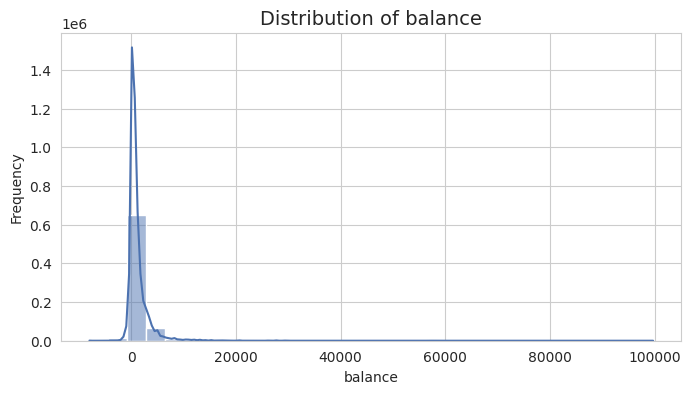

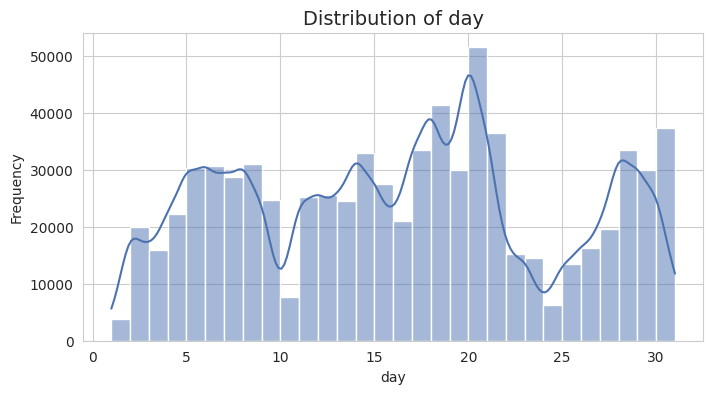

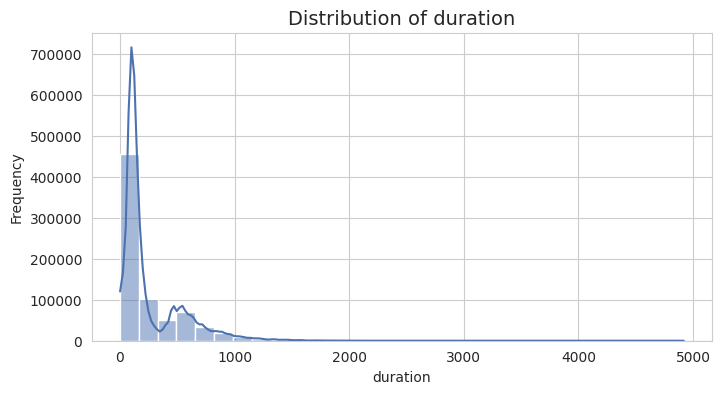

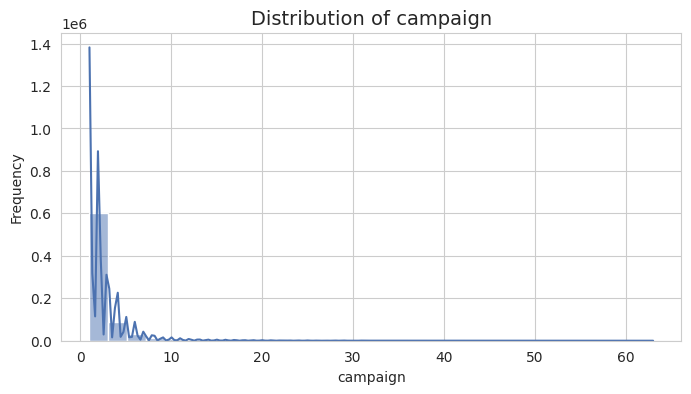

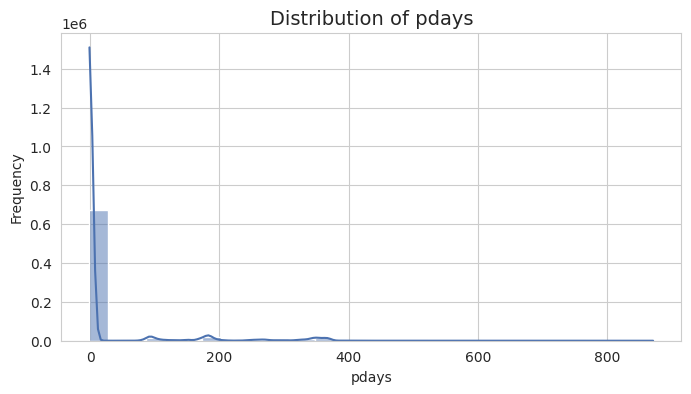

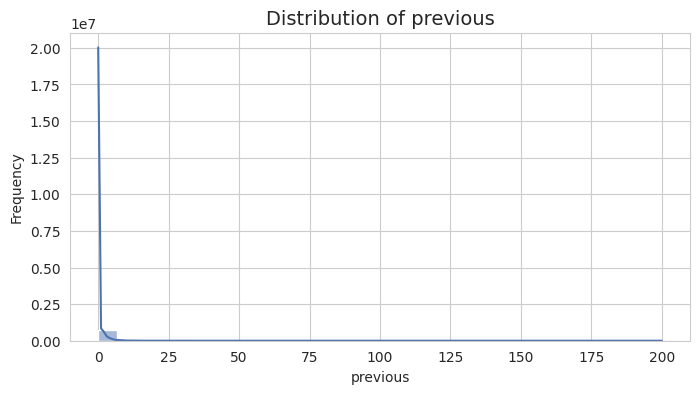

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("deep")

numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(train[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### Outlier Detection with Boxplots
We use boxplots to visually detect outliers in numeric columns.


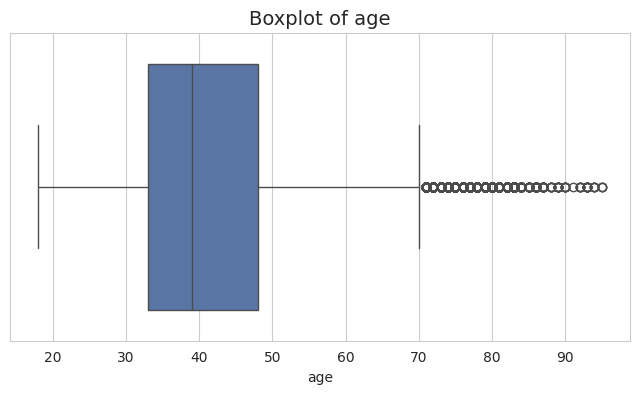

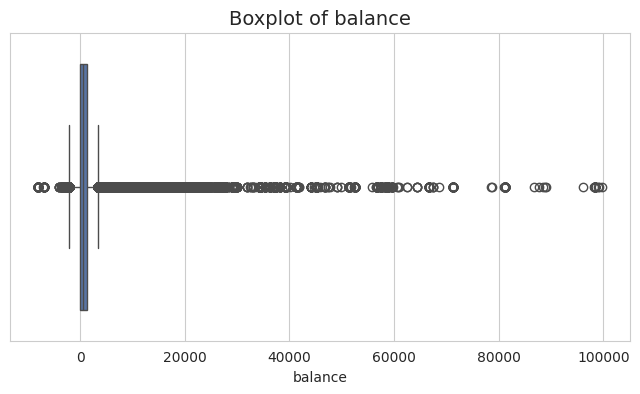

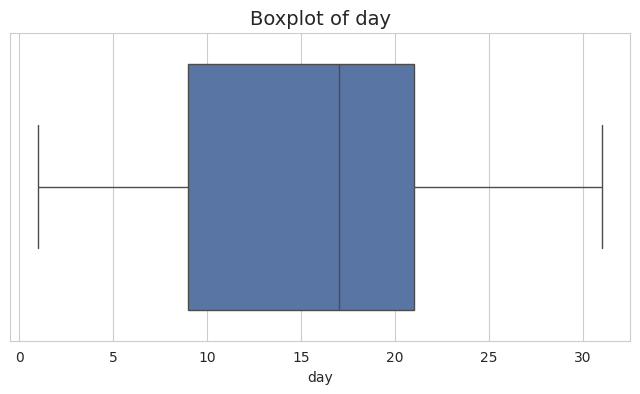

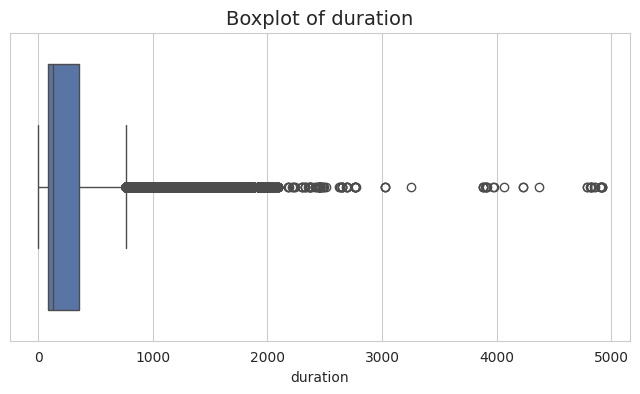

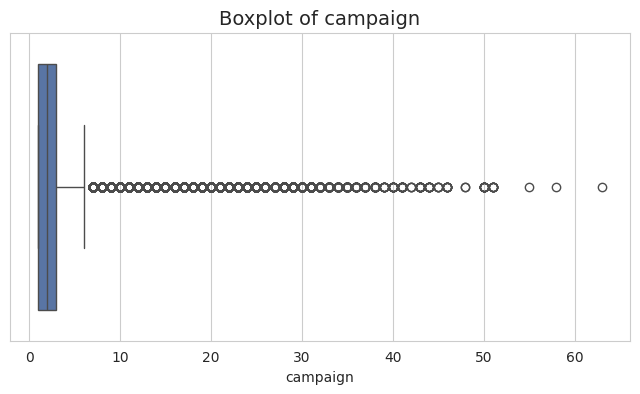

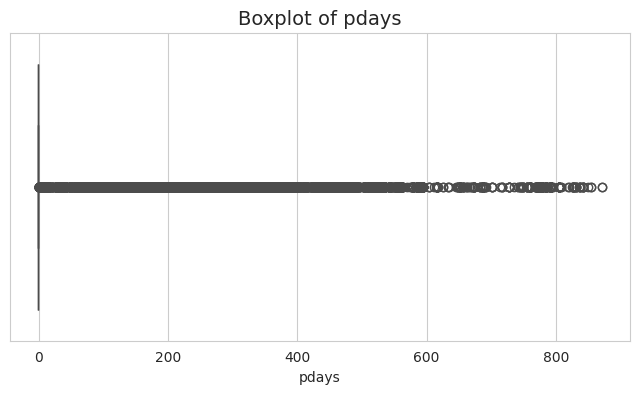

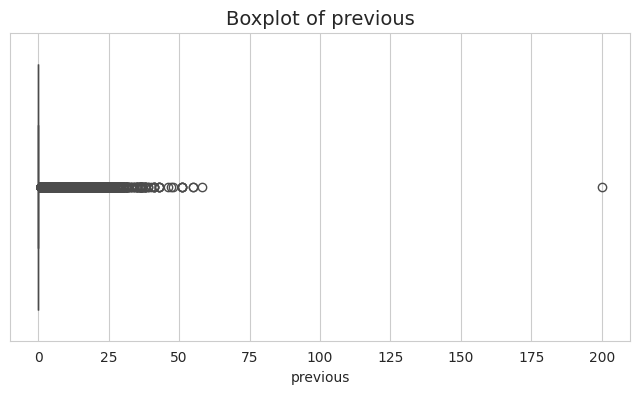

In [12]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train[col])
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.show()

###  Correlation Heatmap
We calculate and visualize the correlation between numeric features and the target variable `y`.

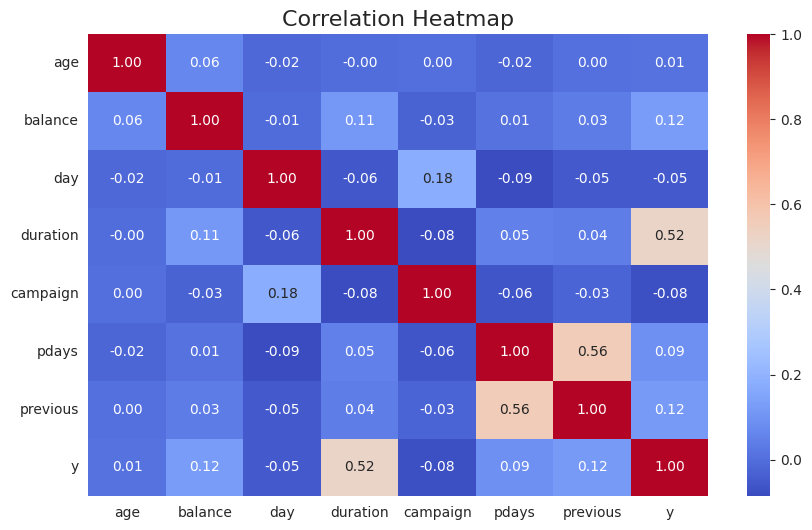

In [13]:
plt.figure(figsize=(10, 6))
corr = train[numeric_cols + ['y']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

###  Target Variable Analysis
We analyze how each numeric feature varies based on the target variable `y`.

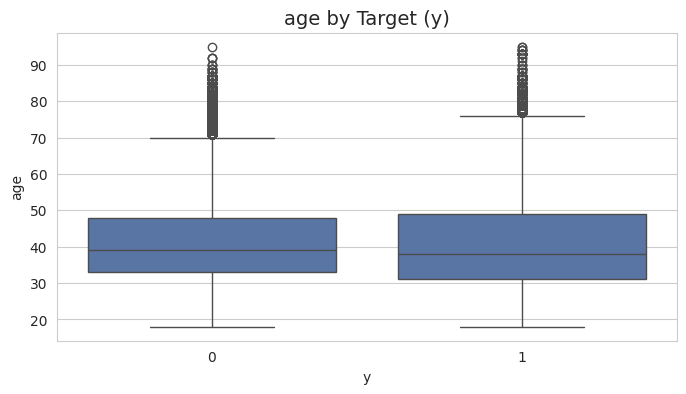

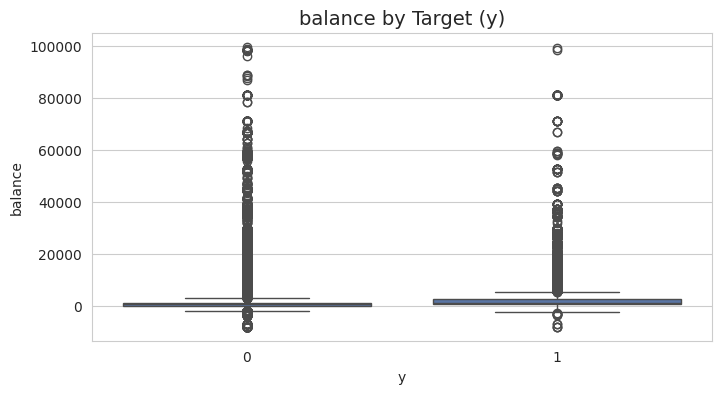

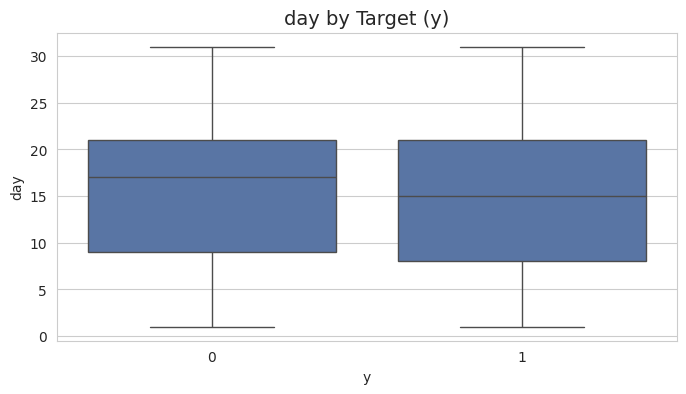

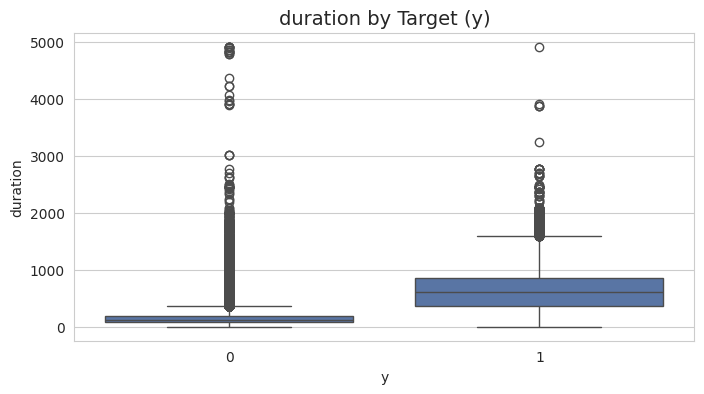

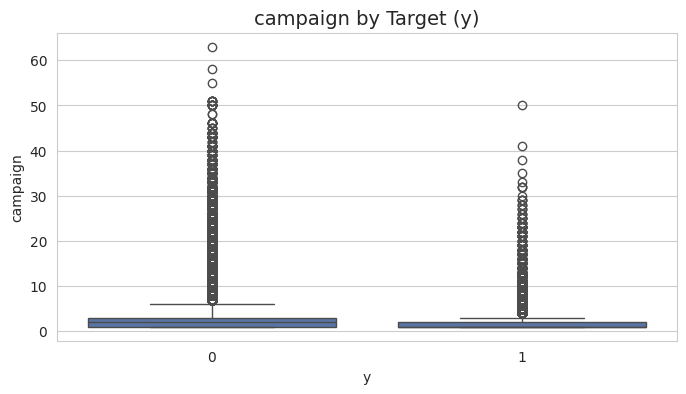

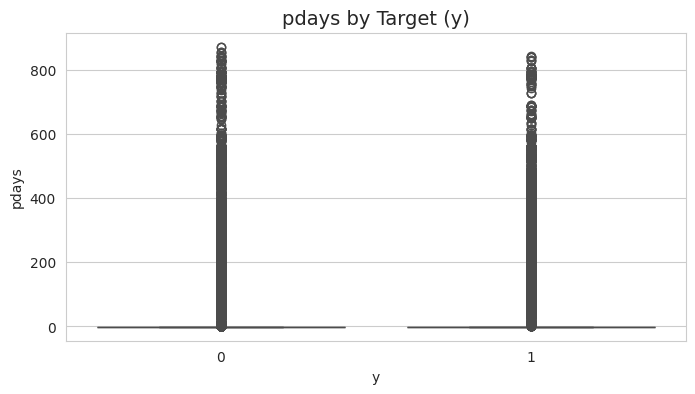

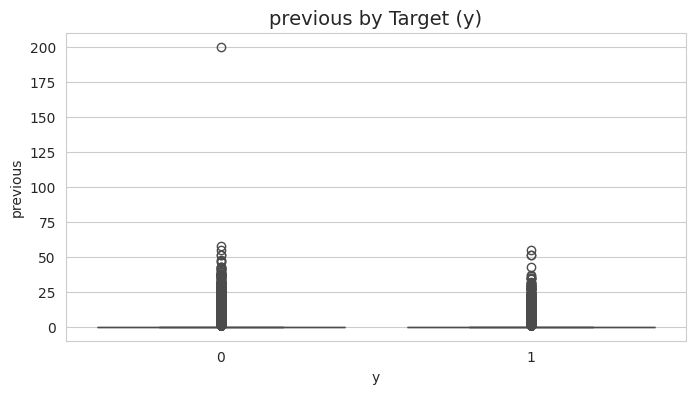

In [14]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='y', y=col, data=train)
    plt.title(f"{col} by Target (y)", fontsize=14)
    plt.show()

# 🧹 Data Preprocessing Pipeline

This section focuses on preparing the dataset for modeling.  
We will:
1. Drop unnecessary columns (`id`)  
2. Handle skewness in numeric features  
3. Detect and cap outliers  
4. Encode categorical variables  
5. Scale the features  

After these steps, the data will be ready for training machine learning models.


## Drop Unnecessary Columns

We will remove the `id` column since it does not provide predictive value.


In [15]:
train_proc = train.copy()
test_proc = test.copy()
train_proc.drop(columns=['id'], inplace=True)
test_proc.drop(columns=['id'], inplace=True)
print("Train shape:", train_proc.shape)
print("Test shape:", test_proc.shape)

Train shape: (750000, 17)
Test shape: (250000, 16)


### Skewness Analysis

We will calculate the skewness of numeric features to identify variables with high skew,  
which may need transformation for better model performance.

In [16]:
from scipy.stats import skew

numeric_cols = train_proc.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'y' in numeric_cols:
    numeric_cols.remove('y')

skewness = train_proc[numeric_cols].apply(lambda x: skew(x.dropna()))
skewness = skewness.sort_values(ascending=False)
print("Skewness (descending):")
print(skewness)

skewed_cols = skewness[skewness.abs() > 0.5].index.tolist()
print("\nColumns considered skewed (|skew| > 0.5):", skewed_cols)

Skewness (descending):
previous    13.749858
balance     12.304098
campaign     4.810427
pdays        3.625041
duration     2.048772
age          0.586136
day          0.054014
dtype: float64

Columns considered skewed (|skew| > 0.5): ['previous', 'balance', 'campaign', 'pdays', 'duration', 'age']


###  Handle Skewness with Yeo-Johnson Transformation

In [17]:
from sklearn.preprocessing import PowerTransformer

if len(skewed_cols) > 0:
    pt = PowerTransformer(method='yeo-johnson', standardize=False)
    train_proc[skewed_cols] = pt.fit_transform(train_proc[skewed_cols])
    test_proc[skewed_cols] = pt.transform(test_proc[skewed_cols])
    print("Applied Yeo-Johnson to skewed columns.")
else:
    print("No strongly skewed columns detected.")

Applied Yeo-Johnson to skewed columns.


### Outlier Handling

We will cap extreme values using the 1st and 99th percentiles based on training data.


In [18]:
lower_q, upper_q = 0.01, 0.99
for col in numeric_cols:
    lower = train_proc[col].quantile(lower_q)
    upper = train_proc[col].quantile(upper_q)
    train_proc[col] = train_proc[col].clip(lower, upper)
    test_proc[col] = test_proc[col].clip(lower, upper)

print("Clipped numeric columns to 1st-99th percentiles.")

Clipped numeric columns to 1st-99th percentiles.


### Encoding Categorical Variables

We will one-hot encode categorical features and align the columns between train and test datasets.

In [19]:
y = train_proc['y'].copy()
X = train_proc.drop(columns=['y'])

cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", cat_cols)

if len(cat_cols) > 0:
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
    test_proc = pd.get_dummies(test_proc, columns=cat_cols, drop_first=True)
    X, test_proc = X.align(test_proc, join='left', axis=1, fill_value=0)
    print("Applied one-hot encoding.")
else:
    print("No categorical columns found.")

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Applied one-hot encoding.


### Feature Scaling

We will standardize all features to have mean 0 and variance 1 using `StandardScaler`.


In [20]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_proc)

X_preprocessed = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
test_preprocessed = pd.DataFrame(test_scaled, columns=X.columns, index=test_proc.index)

print("Preprocessing complete. Shapes:")
print("X_preprocessed:", X_preprocessed.shape)
print("test_preprocessed:", test_preprocessed.shape)

Preprocessing complete. Shapes:
X_preprocessed: (750000, 42)
test_preprocessed: (250000, 42)


## 🤖 Model Selection & Training
In this section, we will:
- Split the preprocessed dataset into training and validation sets.
- Train different machine learning models.
- Evaluate each model using metrics such as Accuracy, Precision, Recall, and F1-Score.
- Select the best-performing model for the test data.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Split data
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}")

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    print(f"\n{name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

Train shape: (600000, 42), Validation shape: (150000, 42)

Logistic Regression Results:
Accuracy: 0.9158
Precision: 0.7032
Recall: 0.5229
F1 Score: 0.5998

Random Forest Results:
Accuracy: 0.9309
Precision: 0.7502
Recall: 0.6401
F1 Score: 0.6908


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:32:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Results:
Accuracy: 0.9332
Precision: 0.7577
Recall: 0.6566
F1 Score: 0.7036


# 🔍 XGBoost Model Training and Evaluation

---

## 🎯 Hyperparameter Tuning (RandomizedSearchCV)

In this section, we use **RandomizedSearchCV** to search for the best hyperparameters for the XGBoost model.  
This step helps us identify the best combination of parameters that maximize model performance.


In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

xgb = XGBClassifier(eval_metric='logloss', random_state=42, tree_method='hist')

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    scoring='f1',
    n_iter=20,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_xgb = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

y_pred_best = best_xgb.predict(X_val)

print("\nClassification Report (Tuned XGBoost):")
print(classification_report(y_val, y_pred_best))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.8}

Classification Report (Tuned XGBoost):
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    131902
           1       0.76      0.68      0.72     18098

    accuracy                           0.94    150000
   macro avg       0.86      0.82      0.84    150000
weighted avg       0.93      0.94      0.93    150000



## 🏆 Final Model with Best Parameters

After finding the optimal parameters, we retrain the model using these values.  
This ensures reproducibility and allows us to evaluate the final model on **Validation** and **Test** datasets.

---

📌 *Note:*  
- The hyperparameter tuning step may take longer to run, so it can be skipped if you already know the best parameters.  
- The final model section is ready-to-run and uses the chosen hyperparameters for quick evaluation.

In [23]:
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
print(f"Scale_pos_weight: {scale_pos_weight:.2f}")

Scale_pos_weight: 7.29


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

X_train, X_temp, y_train, y_temp = train_test_split(
    X_preprocessed, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Shapes:")
print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

xgb_improved = XGBClassifier(
    random_state=42,
    tree_method='hist',
    eval_metric='logloss',
    n_estimators=500,
    max_depth=9,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.3,
    min_child_weight=5
)

xgb_improved.fit(X_train, y_train)

print("\nValidation Performance:")
val_pred = xgb_improved.predict(X_val)
print(classification_report(y_val, val_pred))

print("\nTest Performance:")
test_pred = xgb_improved.predict(X_test)
print(classification_report(y_test, test_pred))

Shapes:
Train: (525000, 42), Val: (112500, 42), Test: (112500, 42)

Validation Performance:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     98927
           1       0.76      0.68      0.72     13573

    accuracy                           0.94    112500
   macro avg       0.86      0.82      0.84    112500
weighted avg       0.93      0.94      0.93    112500


Test Performance:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     98927
           1       0.77      0.68      0.72     13573

    accuracy                           0.94    112500
   macro avg       0.86      0.83      0.84    112500
weighted avg       0.93      0.94      0.93    112500



## 🔍 Feature Importance  

In this step, we analyze which features contribute the most to the model’s predictions.  
Feature importance helps us:  
- Understand how the model makes decisions.  
- Identify the most relevant features for predictions.  
- Potentially simplify the model by removing less important features.  

We will use **XGBoost’s built-in feature importance** and visualize the top features with a bar chart.  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

             Feature  Importance
40  poutcome_success    0.163725
27   contact_unknown    0.120709
34         month_mar    0.084443
3           duration    0.071225
24       housing_yes    0.064666
31         month_jan    0.043373
33         month_jun    0.035968
37         month_oct    0.029946
41  poutcome_unknown    0.027419
38         month_sep    0.027282


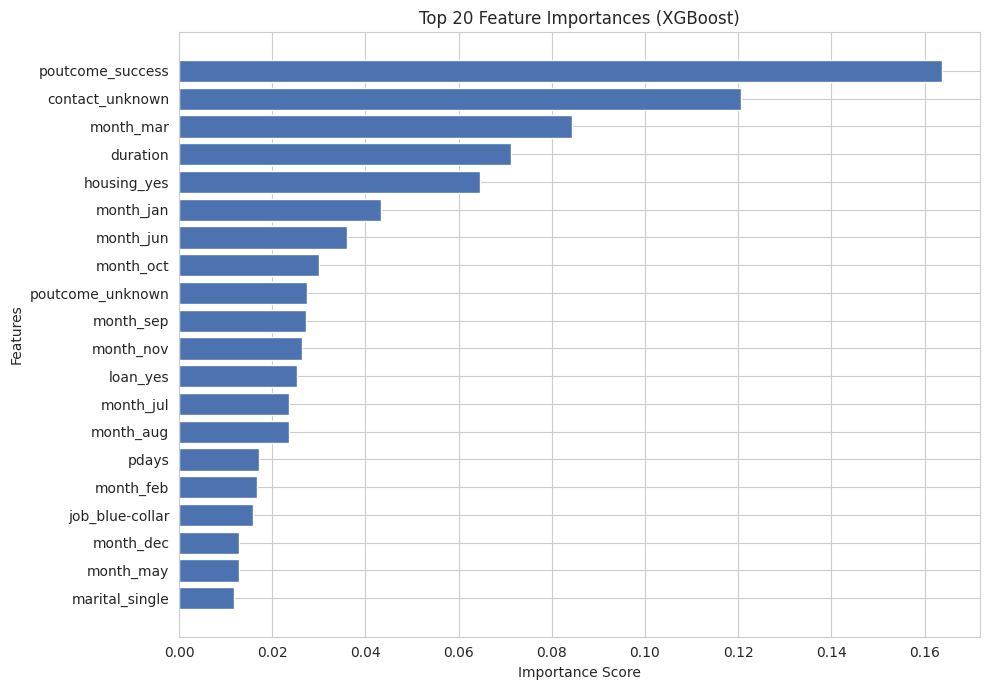

In [30]:
importances = best_xgb.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))

plt.figure(figsize=(10, 7))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20])
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

## 📊 Confusion Matrix & ROC Curve

In this step, we evaluate the performance of the model using:
- **Confusion Matrix:** Shows the number of correct and incorrect predictions, helping us understand errors (false positives and false negatives).
- **ROC Curve & AUC:** Measures the model’s ability to distinguish between classes. The closer the AUC is to 1, the better.

We will visualize both metrics to get a clear picture of the model performance.


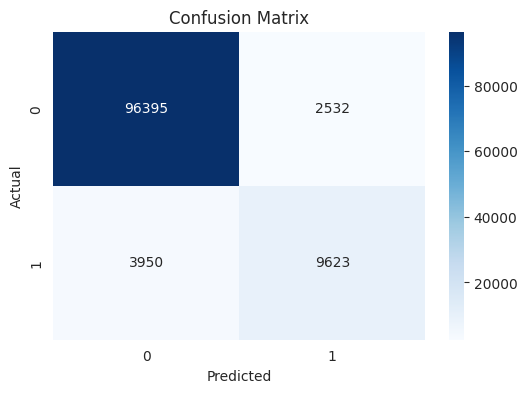

In [32]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
y_val_pred = best_xgb.predict(X_val)
y_val_probs = best_xgb.predict_proba(X_val)[:, 1]

cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

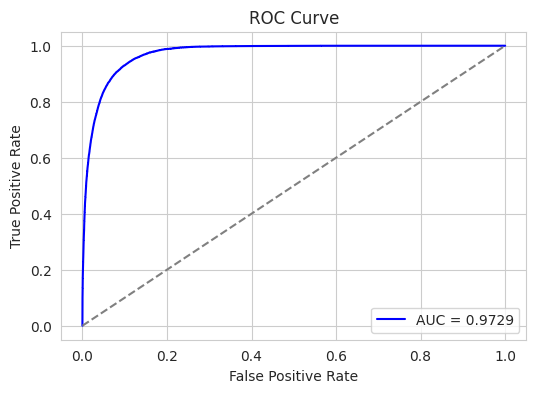

In [33]:
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)
auc_score = roc_auc_score(y_val, y_val_probs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## 🏁 Final Predictions & Submission

In this final step, we:

1. Use the best-performing model (**Tuned XGBoost**) to generate predictions on the test dataset.  
2. Prepare the `submission.csv` file containing:  
   - `id`: Unique identifier for each row in the test set.  
   - `target`: Model predictions (0 or 1).  
3. Save the submission file for Kaggle upload.



In [37]:
final_preds = best_xgb.predict(test_preprocessed)
submission = pd.DataFrame({
    "id": test["id"],
    "target": final_preds
})
submission.to_csv("submission.csv", index=False)
print("submission.csv saved successfully!")

submission.csv saved successfully!


## 📝 Conclusion
- Best model: XGBoost (tuned).
- Key metrics: Accuracy ≈ 94%, F1 ≈ 0.72 for minority class.
- Future work:
  - Try LightGBM/CatBoost.
  - Feature engineering (date features, interaction terms).
  - Handle class imbalance more aggressively.

